#  Discriminant Analysis - Linear and Quadratic (LDA/QDA)
LDA finds the dimensions that increase the separability of the classes, while PCA finds dimensions that has the highest variance in the data. LDA is supervised while PCA is unsupervised learning.

Also refer to example on classification of stars and galaxies - https://harvard-iacs.github.io/2018-CS109A/sections/section7/solutions/

In [21]:
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as knn
from sklearn.metrics import confusion_matrix

In [3]:
#read in the GSS data
gssdata = pd.read_csv("./data/gsspartyid.csv")
gssdata.head()

,politicalparty,income,educ,abortion,republican
0,Republican,2152,9,0,1
1,Republican,906,6,0,1
2,Democrat,1373,6,0,0
3,Democrat,1941,4,0,0
4,Democrat,355,7,0,0


In [27]:
LDA = da.LinearDiscriminantAnalysis()
X = gssdata[["income","educ","abortion"]]
Y = gssdata['republican']

model_LDA = LDA.fit(X,Y)

print("Score ",model_LDA.score(X,Y))
ypred = model_LDA.predict(X)

confusion_matrix(Y, ypred)

Score  0.6174445294567712


array([[474, 301],
       [199, 333]], dtype=int64)

In [28]:
QDA = da.QuadraticDiscriminantAnalysis()
model_QDA = QDA.fit(X,Y)

print("Score ", model_QDA.score(X,Y))
ypred2 = model_QDA.predict(X)

confusion_matrix(Y, ypred2)

Score  0.6273909716908952


array([[490, 285],
       [202, 330]], dtype=int64)

In [29]:
# Logistic Reg
logit = lm.LogisticRegression()
logit.fit(X, Y)

print("Score ", logit.score(X,Y))
ypred3 = logit.predict(X)

confusion_matrix(Y, ypred3)

Score  0.6097934200459066


array([[676,  99],
       [411, 121]], dtype=int64)

In [39]:
# knn
knn5 = knn.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,Y)

print("Score ", knn5.score(X,Y))
ypred4 = knn5.predict(X)

confusion_matrix(Y, ypred4)

Score  0.6993114001530222


array([[633, 142],
       [251, 281]], dtype=int64)

## Example 1 - Temporal patterns in urban demographic changes
- Geographic distribution of households across low, middle, and high income levels from 2000 to 2010
- 0 = Low, 1 = Middle, 2 = High
- 25% annual increase in high income households, 12.5% decrease in each of low and middle

In [45]:
data2000 = np.loadtxt('./data/LDA/dataset_1_year_2000.txt')
data2000

array([[0.54432757, 0.6245105 , 2.        ],
       [0.59468476, 0.72391292, 2.        ],
       [0.70018033, 0.78249208, 2.        ],
       ...,
       [0.46353594, 0.27850471, 0.        ],
       [0.58636407, 0.4009496 , 0.        ],
       [0.17684427, 0.51907277, 0.        ]])

### Visualize

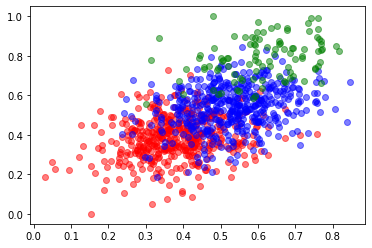

In [73]:
# plot for 2000

x = data2000[:,0]
y = data2000[:,1]
z = data2000[:,2]

plt.scatter(x[z == 0], y[z == 0], color = 'red', label = '0 - Low', alpha = 0.5) 
plt.scatter(x[z == 1], y[z == 1], color = 'blue', label = '1 - Middle', alpha = 0.5) 
plt.scatter(x[z == 2], y[z == 2], color = 'green', label = '2 - High', alpha = 0.5) 


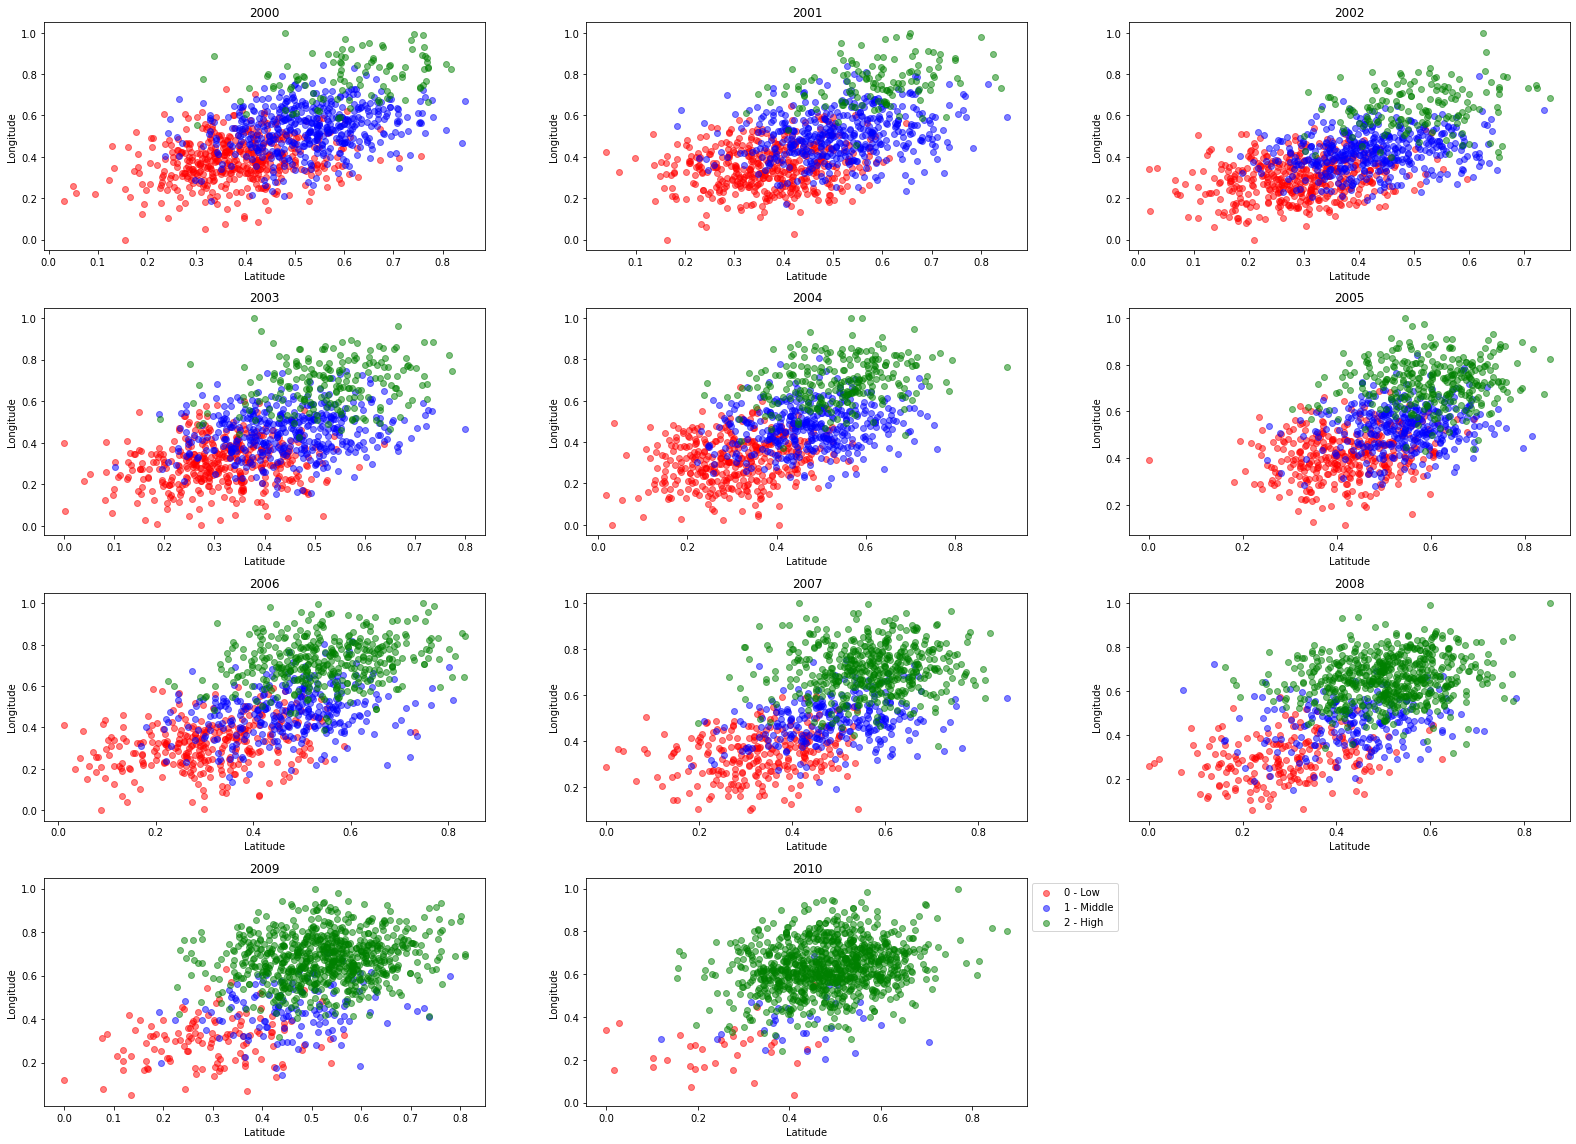

In [103]:
# plot for all 6 years

plt.figure(figsize=(22,16))
plt.subplots_adjust(hspace = 0.6, wspace = .4)

for i in range(0,11):
    data = np.loadtxt('./data/LDA/dataset_1_year_' + str(2000 + i) + '.txt')
    
    # split the columns
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    
    plt.subplot(4, 3, i+1)
    plt.scatter(x[z == 0], y[z == 0], color = 'red', label = '0 - Low', alpha = 0.5) 
    plt.scatter(x[z == 1], y[z == 1], color = 'blue', label = '1 - Middle', alpha = 0.5) 
    plt.scatter(x[z == 2], y[z == 2], color = 'green', label = '2 - High', alpha = 0.5) 
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title(str(2000+i))

# place legend outside based on the coordinates of the last box
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)  
plt.tight_layout()



### Build Models
1. Training a logistic regression model on one year and use it repeatedly
2. Training a Q/LDA model on one year and use it repeatedly
3. Training a KNN model on one year and use it repeatedly
4. Using Bayes Theorem to update LDA/QDA classifiers on a year-by-year basis

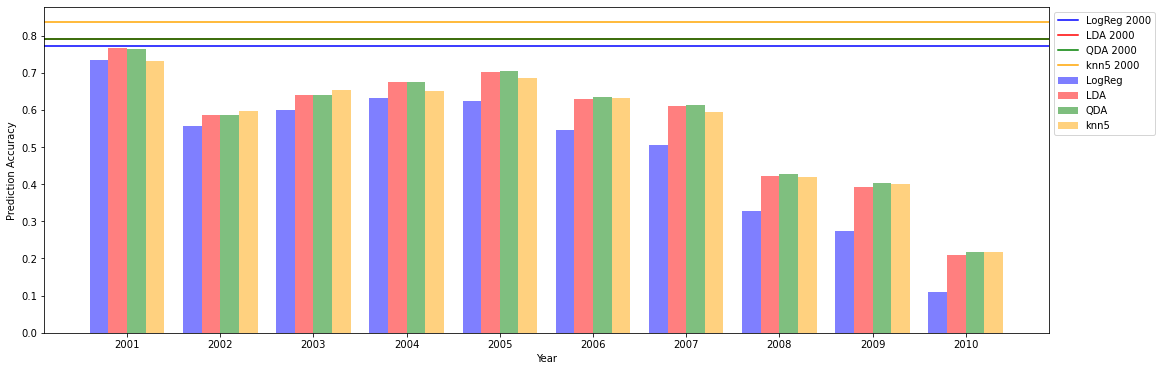

In [188]:
# Year 2000 data
x = data2000[:,0:2]  # x has both lat and long
z = data2000[:,2]

# LogReg
logit = lm.LogisticRegression()
logit.fit(x, z)

# LDA
LDA = da.LinearDiscriminantAnalysis()
LDA.fit(x,z)

# QDA
QDA = da.QuadraticDiscriminantAnalysis()
QDA.fit(x,z)

# knn
knn5 = knn.KNeighborsClassifier(n_neighbors=5)
knn5.fit(x,z)

# Scores for 2000
score_logit_2000 = logit.score(x,z)
score_LDA_2000 = LDA.score(x,z)
score_QDA_2000 = QDA.score(x,z)
score_knn5_2000 = knn5.score(x,z)

score_logit = []
score_LDA = []
score_QDA = []
score_knn5 = []


# predict for other years
plt.figure(figsize=(18,6))
for i in range(1,11):
    data = np.loadtxt('./data/LDA/dataset_1_year_' + str(2000 + i) + '.txt')
    
    # split the columns and get x and z
    x = data[:,0:2]
    z = data[:,2]
    score_logit = np.append(score_logit, logit.score(x,z))
    score_LDA = np.append(score_LDA, LDA.score(x,z))
    score_QDA = np.append(score_QDA, QDA.score(x,z)) 
    score_knn5 = np.append(score_knn5, knn5.score(x,z)) 

years = np.arange(2001,2011)

plt.bar(years, score_logit, color = 'blue', alpha = 0.5, width = 0.2, label = 'LogReg')
plt.bar(years + 0.2, score_LDA, color = 'red', alpha = 0.5, width = 0.2, label = 'LDA')
plt.bar(years + 0.4, score_QDA, color = 'green', alpha = 0.5, width = 0.2, label = 'QDA')
plt.bar(years + 0.6, score_knn5, color = 'orange', alpha = 0.5, width = 0.2, label = 'knn5')
plt.axhline(score_logit_2000, 0, 1, linestyle = '-', label = 'LogReg 2000', color = 'blue')
plt.axhline(score_LDA_2000, 0, 1, linestyle = '-', label = 'LDA 2000', color = 'red')
plt.axhline(score_QDA_2000, 0, 1, linestyle = '-', label = 'QDA 2000', color = 'green')
plt.axhline(score_knn5_2000, 0, 1, linestyle = '-', label = 'knn5 2000', color = 'orange')

plt.xlabel("Year")
plt.ylabel("Prediction Accuracy")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#plt.xticks(np.arange(2001, 2011, 1));
plt.xticks(years + 0.3, years);


###  Training the Q/LDA model yearly
Change in proportion of each segment across the years

<ipython-input-201-cbfd9e12327f>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, 6, i/2 +1)
<ipython-input-201-cbfd9e12327f>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, 6, i/2 +7)
<ipython-input-201-cbfd9e12327f>:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, 6, i/2 +13)


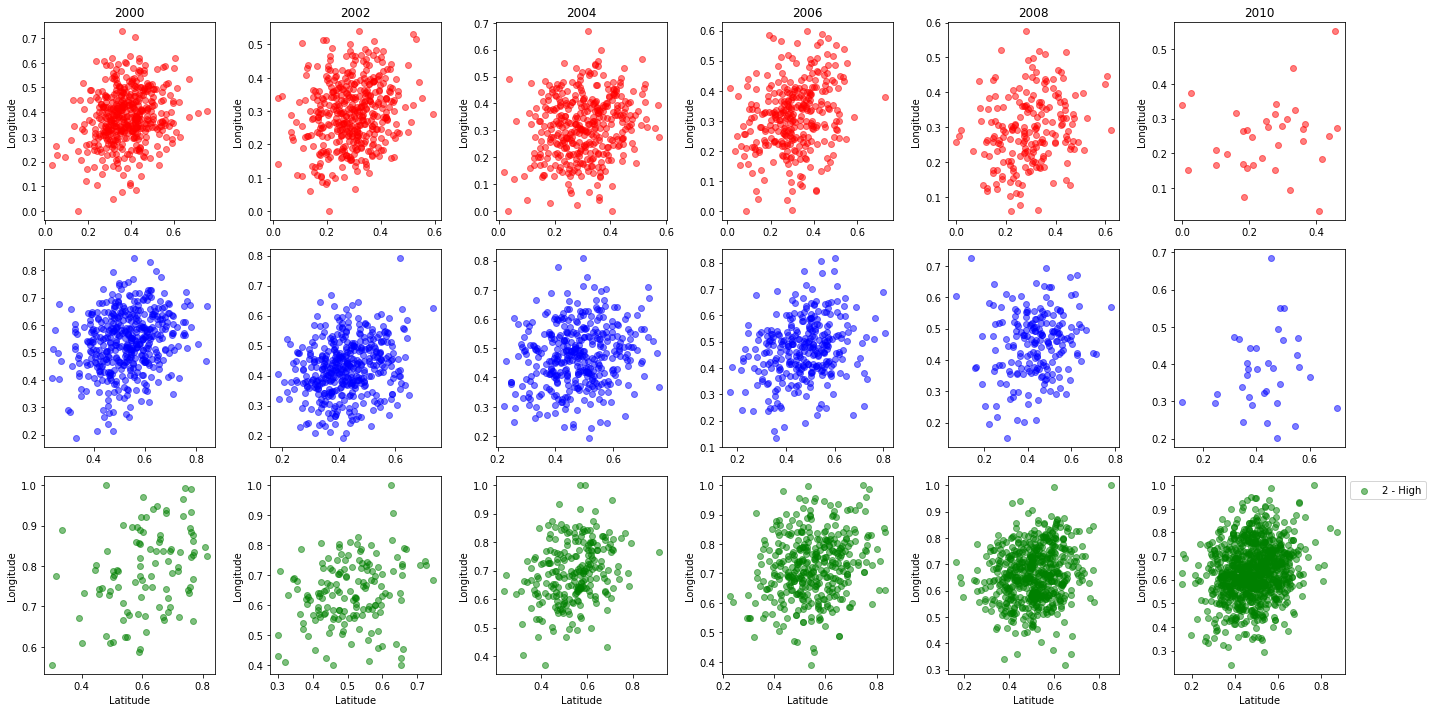

In [201]:
# See how the population varies for each segment every two years

plt.figure(figsize=(20,10))
#plt.subplots_adjust(hspace = 0.6, wspace = .4)

for i in range(0, 11, 2):
    data = np.loadtxt('./data/LDA/dataset_1_year_' + str(2000 + i) + '.txt')
    
    # split the columns
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    
    # Total of 18 plots, with each row for a specific income level
    # Hence the (i/2 + 1) (i/2 + 7) and (i/2 + 13) to specify plots for each row
    
    plt.subplot(3, 6, i/2 +1)
    plt.scatter(x[z == 0], y[z == 0], color = 'red', label = '0 - Low', alpha = 0.5)
    plt.ylabel("Longitude")
    plt.title(str(2000+i))
    
    plt.subplot(3, 6, i/2 +7)
    plt.scatter(x[z == 1], y[z == 1], color = 'blue', label = '1 - Middle', alpha = 0.5) 
    plt.ylabel("Longitude")
    
    plt.subplot(3, 6, i/2 +13)
    plt.scatter(x[z == 2], y[z == 2], color = 'green', label = '2 - High', alpha = 0.5) 
    plt.ylabel("Longitude")
        
    plt.xlabel("Latitude")
        

# place legend outside based on the coordinates of the last box
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)  
plt.tight_layout()

The spread of the households for each category looks the same and are normally distruibuted. Hence mean for each variable (lat and long) and the covariance can be assumed to be the same for each year.

We will then use the model for 2000, update the next year's class probability with that year's class proportion and then predict the classes for the following years.

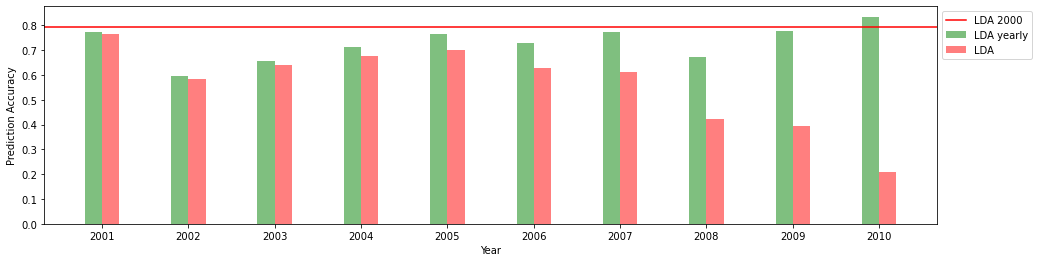

In [241]:
# Year 2000 data
x = data2000[:,0:2]  # x has both lat and long
z = data2000[:,2]

# LDA
LDA = da.LinearDiscriminantAnalysis()
LDA.fit(x,z)

# Calculate the proportion of each class in 2000
p0_2000 = (z == 0).mean()
p1_2000 = (z == 1).mean()
p2_2000 = (z == 2).mean()

# Current year's proportion
p0_current = p0_2000
p1_current = p1_2000
p2_current = p2_2000

# empty array for corrected LDA scores
score_LDA_corrected = []

# predict for other years
plt.figure(figsize=(16,4))
for i in range(1,11):
    data = np.loadtxt('./data/LDA/dataset_1_year_' + str(2000 + i) + '.txt')
    
    # split the columns and get x and z
    x = data[:,0:2]
    z = data[:,2]
    
    # Update the class proportions for current year
    # high income increases by 25%, low and middle decrease by half each
    p2_current = p2_current * 1.25 
    p1_current = (1-p2_current) / 2
    p0_current = (1-p2_current) / 2
    
    # predict the probability of this year and update them with the new class proportions
    prob_current = LDA.predict_proba(x)  # gives prob of each class for all observations (nx3)
    prob_current[:,0] = prob_current[:,0] * (p0_current / p0_2000)
    prob_current[:,1] = prob_current[:,1] * (p1_current / p1_2000)
    prob_current[:,2] = prob_current[:,2] * (p2_current / p2_2000)

    # Predict the class based on max probability for each observation
    # argmax with axis = 1 gives the col index of the max value
    zpred = prob_current.argmax(axis = 1)
    
    # Calc corrected LDA score
    score_LDA_corrected.append(np.mean(z == zpred))
    

# plot corrected scores
years = np.arange(2001,2011)

plt.bar(years , score_LDA_corrected, color = 'green', alpha = 0.5, width = 0.2, label = 'LDA yearly')
plt.bar(years + 0.2, score_LDA, color = 'red', alpha = 0.5, width = 0.2, label = 'LDA')
plt.axhline(score_LDA_2000, 0, 1, linestyle = '-', label = 'LDA 2000', color = 'red')

plt.xlabel("Year")
plt.ylabel("Prediction Accuracy")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xticks(years + 0.1, years);

    

## Example 2 - Geographic Patterns in urban demographics 

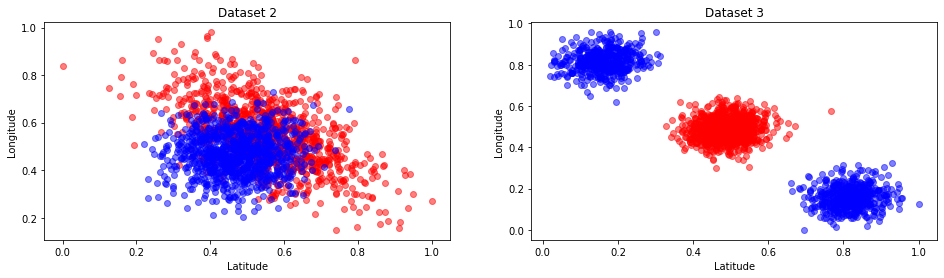

In [251]:
plt.figure(figsize=(16,4))

# plot dataset 2
plt.subplot(1, 2, 1 )
data2 = np.loadtxt('./data/LDA/dataset_2.txt')

# get the lat, long, and class
x = data2[:,0]
y = data2[:,1]
z = data2[:,2]

plt.scatter(x[z == 0], y[z == 0], color = 'red', label = '0 - Low', alpha = 0.5) 
plt.scatter(x[z == 1], y[z == 1], color = 'blue', label = '1 - Middle', alpha = 0.5) 
plt.scatter(x[z == 2], y[z == 2], color = 'green', label = '2 - High', alpha = 0.5) 
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Dataset 2")


# plot dataset 3
plt.subplot(1, 2, 2)
data3 = np.loadtxt('./data/LDA/dataset_3.txt')

# get the lat, long, and class
x = data3[:,0]
y = data3[:,1]
z = data3[:,2]

plt.scatter(x[z == 0], y[z == 0], color = 'red', label = '0 - Low', alpha = 0.5) 
plt.scatter(x[z == 1], y[z == 1], color = 'blue', label = '1 - Middle', alpha = 0.5) 
plt.scatter(x[z == 2], y[z == 2], color = 'green', label = '2 - High', alpha = 0.5) 
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Dataset 3");

- KNN would do well with dataset 3 since the classes don't overlap while KNN may not do that well in dataset 2 because of extensive overlap between the classes
- While the both the classes are normally distributed in set 1, only the red ones are normally distributed in set 3. Hence, this does not satisfy the QDA or LDA precondition. So knn may be better for set 3.

In [279]:
def model_compare(dataset, i):
    
    # Year 2000 data
    x = dataset[:,0:2]  # x has both lat and long
    z = dataset[:,2]

    # LogReg
    logit = lm.LogisticRegression()
    logit.fit(x, z)

    # LDA
    LDA = da.LinearDiscriminantAnalysis()
    LDA.fit(x,z)

    # QDA
    QDA = da.QuadraticDiscriminantAnalysis()
    QDA.fit(x,z)

    # knn
    knn5 = knn.KNeighborsClassifier(n_neighbors=5)
    knn5.fit(x,z);

#     print("Pediction Accuracy using dataset", i )
#     print("LogReg", logit.score(x,z))
#     print("LDA   ", LDA.score(x,z))
#     print("QDA   ", QDA.score(x,z)) 
#     print("knn   ", knn5.score(x,z)) 
    
    return(logit.score(x,z), 
           LDA.score(x,z),
           QDA.score(x,z),
           knn5.score(x,z))

In [292]:
L1 = model_compare(data2, 2)
L2 = model_compare(data3, 3)

results = pd.DataFrame(list(zip(L1, L2)),
               columns =['Dataset 2', 'Dataset 3'])
results.index = ['LogReg', 'LDA', 'QDA', 'KNN']
results

,Dataset 2,Dataset 3
LogReg,0.7485,0.505
LDA,0.7480,0.505
QDA,0.7775,0.983
KNN,0.8300,1.000
